In [9]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the input data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the input images to a vector of length 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Gaussian noise to the input images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy_another = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to values between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder on the noisy input data
autoencoder.fit(x_train_noisy, x_train_noisy_another,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Use the trained model to denoise new images
denoised_images = autoencoder.predict(x_test_noisy)


Epoch 1/200
235/235 [==============================] - 2s 9ms/step - loss: 0.2414 - val_loss: 0.1769
Epoch 2/200
235/235 [==============================] - 2s 9ms/step - loss: 0.1608 - val_loss: 0.1499
Epoch 3/200
235/235 [==============================] - 2s 9ms/step - loss: 0.1395 - val_loss: 0.1382
Epoch 4/200
235/235 [==============================] - 2s 9ms/step - loss: 0.1265 - val_loss: 0.1322
Epoch 5/200
235/235 [==============================] - 2s 9ms/step - loss: 0.1161 - val_loss: 0.1296
Epoch 6/200
235/235 [==============================] - 2s 9ms/step - loss: 0.1059 - val_loss: 0.1305
Epoch 7/200
235/235 [==============================] - 2s 10ms/step - loss: 0.0920 - val_loss: 0.1362
Epoch 8/200
235/235 [==============================] - 2s 9ms/step - loss: 0.0730 - val_loss: 0.1437
Epoch 9/200
235/235 [==============================] - 2s 9ms/step - loss: 0.0390 - val_loss: 0.1524
Epoch 10/200
235/235 [==============================] - 2s 11ms/step - loss: -0.0100 - val

235/235 [==============================] - 2s 9ms/step - loss: -53.5193 - val_loss: 5.0423
Epoch 81/200
235/235 [==============================] - 2s 10ms/step - loss: -54.9414 - val_loss: 5.1566
Epoch 82/200
235/235 [==============================] - 3s 14ms/step - loss: -56.4525 - val_loss: 5.2632
Epoch 83/200
235/235 [==============================] - 2s 10ms/step - loss: -57.9026 - val_loss: 5.3979
Epoch 84/200
235/235 [==============================] - 3s 11ms/step - loss: -59.4255 - val_loss: 5.5360
Epoch 85/200
235/235 [==============================] - 3s 11ms/step - loss: -60.9450 - val_loss: 5.6622
Epoch 86/200
235/235 [==============================] - 3s 12ms/step - loss: -62.4818 - val_loss: 5.6352
Epoch 87/200
235/235 [==============================] - 3s 15ms/step - loss: -64.0455 - val_loss: 5.9667
Epoch 88/200
235/235 [==============================] - 3s 13ms/step - loss: -65.5273 - val_loss: 6.0474
Epoch 89/200
235/235 [==============================] - 3s 11ms/step 

Epoch 157/200
235/235 [==============================] - 2s 9ms/step - loss: -221.6684 - val_loss: 18.2144
Epoch 158/200
235/235 [==============================] - 2s 9ms/step - loss: -224.5498 - val_loss: 18.3045
Epoch 159/200
235/235 [==============================] - 2s 9ms/step - loss: -227.5568 - val_loss: 18.3685
Epoch 160/200
235/235 [==============================] - 2s 9ms/step - loss: -230.5569 - val_loss: 19.1580
Epoch 161/200
235/235 [==============================] - 2s 9ms/step - loss: -233.4082 - val_loss: 19.1291
Epoch 162/200
235/235 [==============================] - 2s 9ms/step - loss: -236.4374 - val_loss: 19.2533
Epoch 163/200
235/235 [==============================] - 2s 9ms/step - loss: -239.6676 - val_loss: 19.7262
Epoch 164/200
235/235 [==============================] - 3s 11ms/step - loss: -242.5727 - val_loss: 19.8923
Epoch 165/200
235/235 [==============================] - 3s 12ms/step - loss: -245.4633 - val_loss: 19.8047
Epoch 166/200
235/235 [============

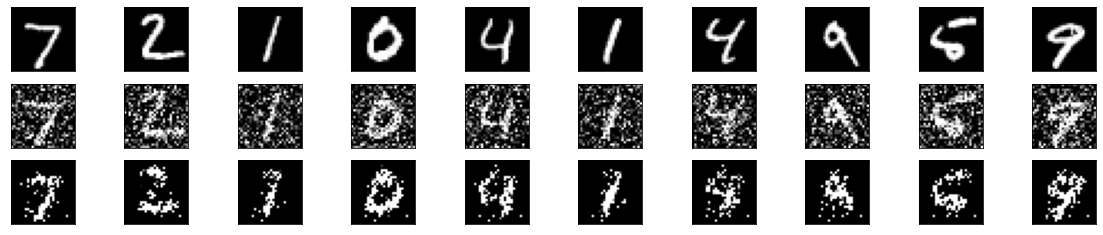

In [10]:
import matplotlib.pyplot as plt

# Reshape the denoised images to their original shape
denoised_images = denoised_images.reshape((len(denoised_images), 28, 28))

# Plot a few examples of original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
